## Sharing visualizations with others

This chapter shows you how to share your visualizations with others: how to save your figures as files, how to adjust their look and feel, and how to automate their creation based on input data.

In [2]:
import pandas as pd

df = pd.read_csv("nrmavg.csv")
df1 = pd.read_csv("nrmpcp.csv")


austin_weather = df[df['CITY'].str.match('AUSTIN/CITY')]
austin_weather = austin_weather.drop(['CITY', 'STATE'], axis=1)
austin_weather = austin_weather.T
austin_weather.reset_index(inplace=True)
#austin_weather.rename(columns={"index": "MONTH", 226: "MEAN_TEMP"}, inplace = True)
austin_weather.columns = ['MONTH', 'MEAN_TEMP']

austin_precip = df1[df1['CITY'].str.match('AUSTIN/CITY')]
austin_precip = austin_precip.drop(['CITY', 'STATE'], axis=1)
austin_precip = austin_precip.T
austin_precip.reset_index(inplace=True)
austin_precip.columns = ['MONTH', 'NORM_PRECIP']
#display(austin_precip)

austin_weather = austin_weather.join(austin_precip["NORM_PRECIP"])

display(austin_weather)

seattle_weather = df[df['CITY'].str.match('SEATTLE C.O')]
seattle_weather = seattle_weather.drop(['CITY', 'STATE'], axis=1)
seattle_weather = seattle_weather.T
seattle_weather.reset_index(inplace=True)
seattle_weather.columns = ['MONTH', 'MEAN_TEMP']

seattle_precip = df1[df1['CITY'].str.match('SEATTLE C.O')]
seattle_precip = seattle_precip.drop(['CITY', 'STATE'], axis=1)
seattle_precip = seattle_precip.T
seattle_precip.reset_index(inplace=True)
seattle_precip.columns = ['MONTH', 'NORM_PRECIP']

seattle_weather = seattle_weather.join(seattle_precip["NORM_PRECIP"])

display(seattle_weather)


,MONTH,MEAN_TEMP,NORM_PRECIP
0,JAN,51.5,2.22
1,FEB,55.0,2.02
2,MAR,61.7,2.76
3,APR,69.2,2.09
4,MAY,76.6,4.44
5,JUN,82.2,4.33
6,JUL,85.0,1.88
7,AUG,85.8,2.35
8,SEP,80.0,2.99
9,OCT,71.2,3.88


,MONTH,MEAN_TEMP,NORM_PRECIP
0,JAN,43.0,5.47
1,FEB,44.3,3.52
2,MAR,47.6,3.85
3,APR,51.4,2.79
4,MAY,57.3,2.01
5,JUN,62.0,1.57
6,JUL,66.2,0.85
7,AUG,66.6,0.94
8,SEP,61.9,1.30
9,OCT,53.7,3.38


### Switching between styles

Selecting a style to use affects all of the visualizations that are created after this style is selected.

Here, you will practice plotting data in two different styles. 

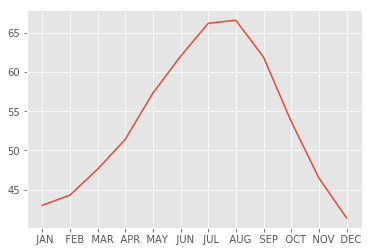

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.plot(seattle_weather["MONTH"], seattle_weather["MEAN_TEMP"])
plt.show()


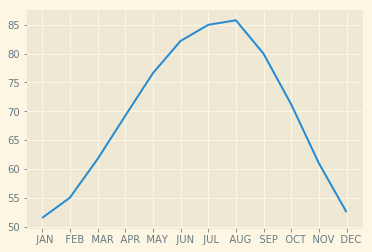

In [4]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()

ax.plot(austin_weather["MONTH"], austin_weather["MEAN_TEMP"])
plt.show()

### Saving a file several times

If you want to share your visualizations with others, you will need to save them into files. Matplotlib provides as way to do that, through the `savefig` method of the `Figure` object. In this exercise, you will save a figure several times. Each time setting the parameters to something slightly different. 

In [5]:
# Save as a PNG file
fig.savefig("my_figure.png")

# Save as a PNG file with 300 dpi
fig.savefig("my_figure_300dpi.png", dpi=300)


### Save a figure with different sizes

Before saving your visualization, you might want to also set the size that the figure will have on the page. To do so, you can use the `Figure` object's `set_size_inches` method. This method takes a sequence of two values. The first sets the width and the second sets the height of the figure.

Use the `Figure` methods `set_size_inches` and `savefig` to change its size and save two different versions of this figure.

In [6]:
fig.set_size_inches([3,5])
fig.savefig('figure_3_5.png')

# Set figure dimensions and save as a PNG
fig.set_size_inches([5,3])
fig.savefig('figure_5_3.png')

%ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 58D9-ED26

 Directory of C:\Users\Jacob\AnacondaProjects\Datacamp\Introduction to Data Visualization with Matplotlib

04/06/2020  12:07 PM    <DIR>          .
04/06/2020  12:07 PM    <DIR>          ..
04/06/2020  09:10 AM    <DIR>          .ipynb_checkpoints
10/01/2019  12:25 PM        41,500,688 athlete_events.csv
04/04/2020  02:07 PM           696,710 chapter1.pdf
04/05/2020  10:40 AM           689,026 chapter2.pdf
04/05/2020  06:19 PM           836,187 chapter3.pdf
04/06/2020  09:07 AM         1,814,570 chapter4.pdf
04/05/2020  12:19 PM            15,670 climate_change.csv
04/06/2020  12:07 PM            11,983 figure_3_5.png
04/06/2020  12:07 PM            12,227 figure_5_3.png
04/05/2020  10:30 AM           135,636 Introduction to Matplotlib.ipynb
04/04/2020  02:13 PM           230,092 Matplotlib Cheatsheet.pdf
04/05/2020  06:56 PM               211 medals.csv
04/06/2020  12:02 PM            14,309 my_figure.png
04/06/2020

### Unique values of a column

One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In [10]:
olympics = pd.read_csv("athlete_events.csv")
display(olympics.head(2))

summer_2016_medals = olympics.query('Year == 2016 and Season == "Summer"').dropna()
display(summer_2016_medals.head(2))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze


['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


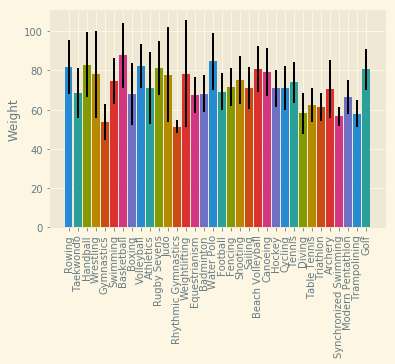

In [12]:
# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr=sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

plt.show()

# Save the figure to file
fig.savefig('sports_weights.png')
